In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import pretty_midi
import librosa
import librosa.display
import gc
from sklearn.preprocessing import StandardScaler
import warnings
from collections import Counter
from torch.utils.data import Dataset
import torch
from pympler import asizeof
import torch.optim as optim 



import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset


from sklearn.preprocessing import StandardScaler

from Preprocessing import *
#from ExtractGenre import *
from CNN_ExtractGenre import *
from PolyphonicPreprocessing import *
import Util as Util

import DatasetLoader as DL
import Model as M



In [2]:
GenreMapping = {'metal': 0, 'disco': 1, 'classical': 2, 'hiphop': 3, 'jazz': 4,
          'country': 5, 'pop': 6, 'blues': 7, 'reggae': 8, 'rock': 9}

In [14]:
with open('RandomSearchPart2.pkl', 'rb') as f:
   RandomSearch = pickle.load(f)

In [19]:
lambdas = {'λ1': np.logspace(-3, 0, 12), 'λ2': np.logspace(-2, 1, 12)}

Ratio = []
for i in RandomSearch:

   
   r = i['loss_g'][-1]/i['loss_d'][-1]

   Ratio.append(r)

Ratio = np.reshape(Ratio, (12, 12))

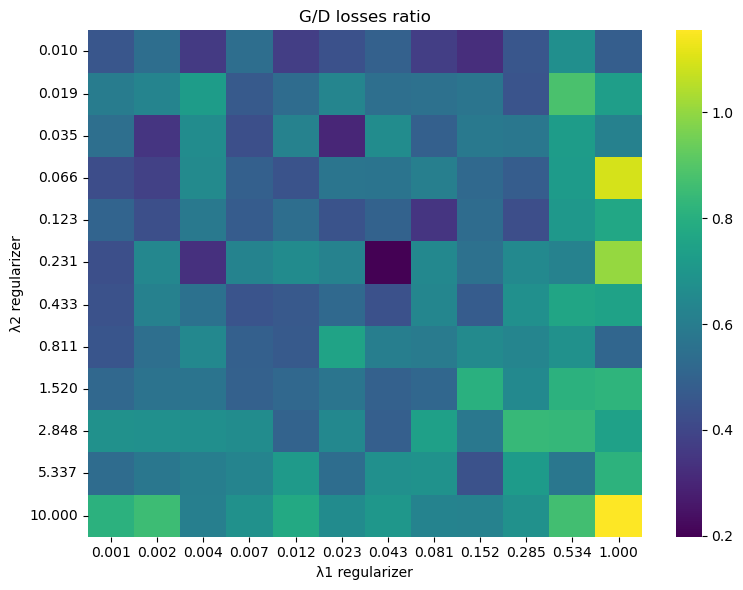

In [22]:
import numpy as np
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(
    Ratio,
    xticklabels=[f"{x:.3f}" for x in lambdas['λ1']],
    yticklabels=[f"{y:.3f}" for y in lambdas['λ2']],
    cmap="viridis", fmt=".2f"
)
plt.xlabel("λ1 regularizer")
plt.ylabel("λ2 regularizer")
plt.title("G/D losses ratio")
plt.tight_layout()
plt.show()

In [12]:
with open('ShannonEntropy.pkl', 'rb') as f:
   SE = pickle.load(f)

In [13]:
SE

[{(0.001, 0.01): (0.8781432507766618,
   1.4380129168430964,
   9.909609604310045,
   0.018627450980392157)},
 {(0.001, 0.01873817422860384): (0.716568179892169,
   1.4312829875946045,
   9.909609604310045,
   0.018627450980392157)},
 {(0.001, 0.03511191734215131): (0.5979309689005217,
   1.4692142589886983,
   9.909609604310045,
   0.018627450980392157)},
 {(0.001, 0.0657933224657568): (0.7338945196072261,
   1.4404921015103658,
   9.909609604310045,
   0.018627450980392157)},
 {(0.001, 0.12328467394420659): (0.7307984156741036,
   1.4409428330262501,
   9.909609604310045,
   0.018627450980392157)},
 {(0.001, 0.23101297000831592): (0.7163149589300155,
   1.4532926603158316,
   6.81626844473035,
   0.7235294117647059)}]